In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('winemag-data-130k-v2.csv')
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
dataset['variety'].nunique()

707

In [4]:
import matplotlib

matplotlib.pyplot.figure(figsize=(15, 20))
dataset['variety'].hist()

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)

ds_tokens = []
for description in dataset['description']:
    tokens = word_tokenize(description)
    tokens = [w.lower() for w in tokens]
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    ds_tokens.append(words)
    
dataset['tokens'] = ds_tokens

KeyboardInterrupt: 

In [ ]:
dataset.head()

In [ ]:
all_tokens = set()

for tokens in dataset['tokens']:
    all_tokens.update(tokens)
    
len(all_tokens)

In [6]:
prds = dataset.copy()

In [ ]:
prds.info()

In [ ]:
prds['variety'].unique()

In [ ]:
dictionary = list(all_tokens)
len(dictionary)

In [ ]:
prds = prds.dropna(subset=['variety'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_names = prds['variety'].unique()

lencoder = LabelEncoder()

lencoder.fit(target_names)
target = lencoder.transform(prds['variety'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=dictionary)

X = vectorizer.fit_transform(prds['description'])
y = target

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tftransformer = TfidfTransformer().fit(X_train)
X_train_tf = tftransformer.transform(X_train)

In [ ]:
X_test_tf = tftransformer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbclassifier = MultinomialNB()
nbclassifier.fit(X_train_tf, y_train)

In [ ]:
from sklearn.linear_model import SGDClassifier

svmclassifier = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)

svmclassifier.fit(X_train_tf, y_train)

In [ ]:
classifier = svmclassifier

In [ ]:
from sklearn import metrics

pred = classifier.predict(X_test_tf)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

In [ ]:
np.mean(pred == y_test)

In [ ]:
# the above classifier sucks, let's try something different

In [8]:
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df = dataset[['description', 'variety']]
df = df[pd.notnull(df['variety'])]

df['variety_id'] = df['variety'].factorize()[0]

variety_id_df = df[['variety', 'variety_id']].drop_duplicates().sort_values('variety_id')
variety_to_id = dict(variety_id_df.values)
id_to_variety = dict(variety_id_df[['variety_id', 'variety']].values)

In [4]:
id_to_variety

{0: 'White Blend',
 1: 'Portuguese Red',
 2: 'Pinot Gris',
 3: 'Riesling',
 4: 'Pinot Noir',
 5: 'Tempranillo-Merlot',
 6: 'Frappato',
 7: 'Gewürztraminer',
 8: 'Cabernet Sauvignon',
 9: 'Nerello Mascalese',
 10: 'Chardonnay',
 11: 'Malbec',
 12: 'Tempranillo Blend',
 13: 'Meritage',
 14: 'Red Blend',
 15: 'Merlot',
 16: "Nero d'Avola",
 17: 'Chenin Blanc',
 18: 'Gamay',
 19: 'Sauvignon Blanc',
 20: 'Viognier-Chardonnay',
 21: 'Primitivo',
 22: 'Catarratto',
 23: 'Inzolia',
 24: 'Petit Verdot',
 25: 'Monica',
 26: 'Bordeaux-style White Blend',
 27: 'Grillo',
 28: 'Sangiovese',
 29: 'Cabernet Franc',
 30: 'Champagne Blend',
 31: 'Bordeaux-style Red Blend',
 32: 'Aglianico',
 33: 'Petite Sirah',
 34: 'Touriga Nacional',
 35: 'Carmenère',
 36: 'Albariño',
 37: 'Petit Manseng',
 38: 'Rosé',
 39: 'Zinfandel',
 40: 'Vernaccia',
 41: 'Rosato',
 42: 'Grüner Veltliner',
 43: 'Viognier',
 44: 'Vermentino',
 45: 'Grenache Blanc',
 46: 'Syrah',
 47: 'Nebbiolo',
 48: 'Shiraz-Cabernet Sauvignon',
 4

In [11]:
df.head()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


In [14]:

df.head()

,description,variety,variety_id
0,"Aromas include tropical fruit, broom, brimston...",White Blend,0
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red,1
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,2
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,3
4,"Much like the regular bottling from 2012, this...",Pinot Noir,4


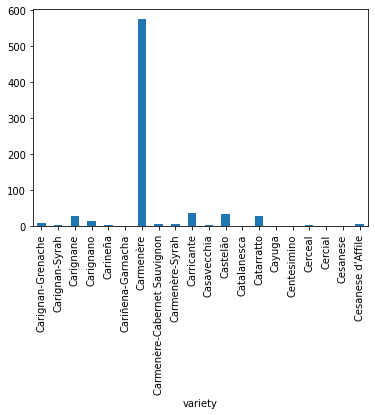

In [14]:
df.groupby('variety').description.count()[100:120].plot.bar()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(df.description)
labels = df.variety_id

features.shape

(129970, 99867)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.feature_selection import chi2

N = 2
for variety, variety_id in sorted(variety_to_id.items()):
    features_chi2 = chi2(features, labels == variety_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(f'# {variety}')
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# Abouriou
  . Most correlated unigrams:
. proximity
. abouriou
  . Most correlated bigrams:
. obscure grape
. abouriou grape
# Agiorgitiko
  . Most correlated unigrams:
. spin
. agiorgitiko
  . Most correlated bigrams:
. cinnamon plum
. exotic spin
# Aglianico
  . Most correlated unigrams:
. taurasi
. aglianico
  . Most correlated bigrams:
. expression aglianico
. aglianico opens
# Aidani
  . Most correlated unigrams:
. greece
. octopus
  . Most correlated bigrams:
. white greece
. indigenous white
# Airen
  . Most correlated unigrams:
. distilled
. corny
  . Most correlated bigrams:
. base grape
. stalky apple
# Albana
  . Most correlated unigrams:
. romagna
. albana
  . Most correlated bigrams:
. light buoyant
. delicate dessert
# Albanello
  . Most correlated unigrams:
. dimensional
. native
  . Most correlated bigrams:
. sweet dimensional
. dense slightly
# Albariño
  . Most correlated unigrams:
. albariños
. albariño
  . Most correlated bigrams:
. rías baixas
. albariño aromas
# 

KeyboardInterrupt: 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['description'], df['variety'], random_state=0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [7]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train_tfidf)
print(classification_report(y_train, y_pred))

/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                     precision    recall  f1-score   support

                           Abouriou       0.00      0.00      0.00         3
                        Agiorgitiko       0.00      0.00      0.00        40
                          Aglianico       0.00      0.00      0.00       260
                             Aidani       0.00      0.00      0.00         1
                              Airen       0.00      0.00      0.00         2
                             Albana       0.00      0.00      0.00        17
                           Albariño       0.00      0.00      0.00       353
                          Albarossa       0.00      0.00      0.00         2
                           Aleatico       0.00      0.00      0.00         5
                        Alfrocheiro       0.00      0.00      0.00        13
                           Alicante       0.00      0.00      0.00         4
                  Alicante Bouschet       0.00      0.00      0.00        3

/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


NameError: name 'plt' is not defined

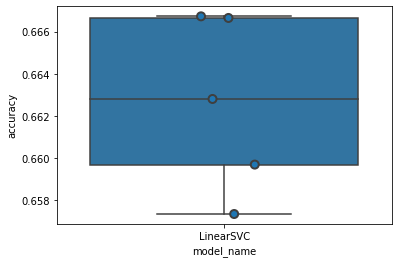

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    #MultinomialNB(),
    #LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    #LinearSVC(),
    #MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [3]:
# still not good enough, try from scratch grouping similar varities and dropping the ones with 
# a low number of reviews

In [5]:
dataset['variety'].value_counts().plot.bar()

In [8]:
keep_varieties = dataset['variety'].value_counts() >= dataset['variety'].value_counts().mean()
keep_varieties = keep_varieties[keep_varieties == True]
keep_varieties

Pinot Noir                  True
Chardonnay                  True
Cabernet Sauvignon          True
Red Blend                   True
Bordeaux-style Red Blend    True
                            ... 
Mourvèdre                   True
Primitivo                   True
Montepulciano               True
Zweigelt                    True
Touriga Nacional            True
Name: variety, Length: 62, dtype: bool

In [9]:
df = dataset[dataset['variety'].isin(keep_varieties.index)]

In [10]:
import matplotlib.pyplot

matplotlib.pyplot.figure(figsize=(16, 8))

df['variety'].value_counts().plot.bar()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['description'], df['variety'], random_state=0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [12]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

y_pred = clf.predict(X_test_tfidf)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

                    Aglianico       0.77      0.54      0.63        91
                     Albariño       0.61      0.50      0.55       112
                      Barbera       0.79      0.60      0.68       180
                Blaufränkisch       0.73      0.46      0.57        71
     Bordeaux-style Red Blend       0.68      0.78      0.73      1735
   Bordeaux-style White Blend       0.72      0.53      0.61       297
               Cabernet Franc       0.64      0.40      0.49       353
           Cabernet Sauvignon       0.61      0.72      0.66      2399
                    Carmenère       0.63      0.49      0.55       137
              Champagne Blend       0.73      0.62      0.67       356
                   Chardonnay       0.72      0.87      0.79      2985
                 Chenin Blanc       0.70      0.49      0.57       146
Corvina, Rondinella, Molinara       0.75      0.70      0.72       164
     

In [13]:
from sklearn.svm import LinearSVC

svcclassifier = LinearSVC()

svcclassifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [14]:
y_pred = svcclassifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

                    Aglianico       0.77      0.54      0.63        91
                     Albariño       0.61      0.50      0.55       112
                      Barbera       0.79      0.60      0.68       180
                Blaufränkisch       0.73      0.46      0.57        71
     Bordeaux-style Red Blend       0.68      0.78      0.73      1735
   Bordeaux-style White Blend       0.72      0.53      0.61       297
               Cabernet Franc       0.64      0.40      0.49       353
           Cabernet Sauvignon       0.61      0.72      0.66      2399
                    Carmenère       0.63      0.49      0.55       137
              Champagne Blend       0.73      0.62      0.67       356
                   Chardonnay       0.72      0.87      0.79      2985
                 Chenin Blanc       0.70      0.49      0.57       146
Corvina, Rondinella, Molinara       0.75      0.70      0.72       164
     

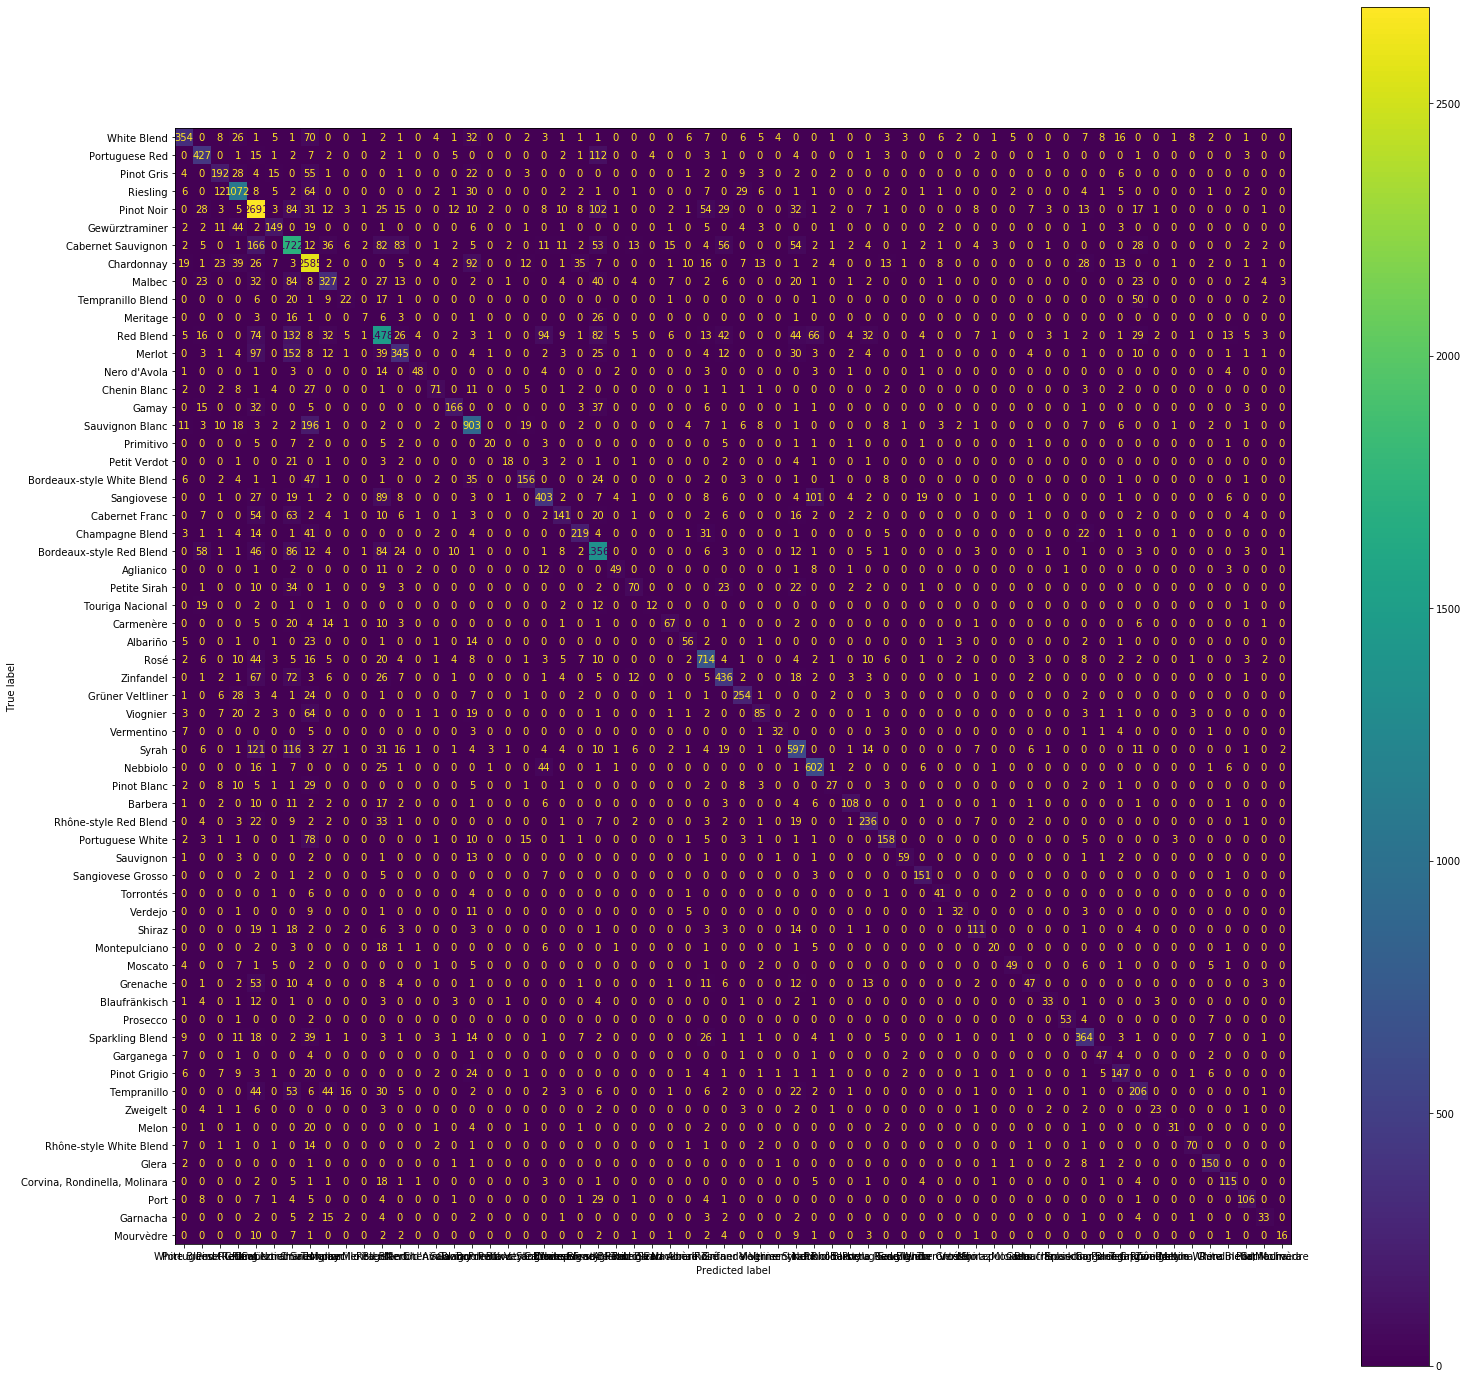

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)

labels = df['variety'].unique()

plot_confusion_matrix(svcclassifier, X_test_tfidf, y_test, labels=labels, ax=ax)